In [10]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import keras
import glob

In [12]:
train_files=glob.glob("chest_xray/train/*/**")

In [13]:
len(train_files)

5216

In [14]:
train_files

['chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0140-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0141-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0143-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0145-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0147-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0149-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0151-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0152-0001.jpeg',
 'chest_xray/train\\NORMAL\\IM-0154-0001

In [15]:
from random import shuffle
shuffle(train_files)
train_files

['chest_xray/train\\PNEUMONIA\\person675_bacteria_2569.jpeg',
 'chest_xray/train\\PNEUMONIA\\person518_bacteria_2199.jpeg',
 'chest_xray/train\\PNEUMONIA\\person1474_virus_2557.jpeg',
 'chest_xray/train\\PNEUMONIA\\person425_bacteria_1860.jpeg',
 'chest_xray/train\\PNEUMONIA\\person413_bacteria_1834.jpeg',
 'chest_xray/train\\PNEUMONIA\\person431_bacteria_1872.jpeg',
 'chest_xray/train\\PNEUMONIA\\person1065_bacteria_2999.jpeg',
 'chest_xray/train\\NORMAL\\NORMAL2-IM-0595-0001.jpeg',
 'chest_xray/train\\PNEUMONIA\\person48_bacteria_231.jpeg',
 'chest_xray/train\\PNEUMONIA\\person1687_bacteria_4468.jpeg',
 'chest_xray/train\\NORMAL\\IM-0425-0001.jpeg',
 'chest_xray/train\\PNEUMONIA\\person24_bacteria_108.jpeg',
 'chest_xray/train\\PNEUMONIA\\person9_bacteria_40.jpeg',
 'chest_xray/train\\PNEUMONIA\\person74_bacteria_363.jpeg',
 'chest_xray/train\\PNEUMONIA\\person480_bacteria_2040.jpeg',
 'chest_xray/train\\NORMAL\\NORMAL2-IM-1385-0001.jpeg',
 'chest_xray/train\\PNEUMONIA\\person918_bac

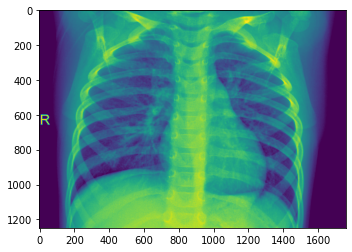

In [16]:
from PIL import Image
img=Image.open(train_files[124])
plt.imshow(img)

In [17]:
np.array(img).shape


(1249, 1758)

In [18]:
grey_scale=[]
resized_files=[]
i=0;

In [19]:
for items in train_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale.append(img)
    img=grey_scale[i].resize((128,128))
    resized_files.append(img)
    i=i+1
    

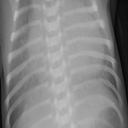

In [20]:
resized_files[0]

In [21]:
len(resized_files)

5216

In [22]:
np.array(resized_files[55]).shape

(128, 128)

In [23]:
X_train=np.zeros((len(resized_files),128,128))
Y_train=np.zeros((len(train_files),1))
for i, fi in enumerate(resized_files):
    #im=Image.open(fi)
    # : -> all elements
    X_train[i,:,:]=np.array(fi)

for i, fis in enumerate(train_files):
    if "NORMAL" in fis:
        Y_train[i]=  0
    elif "bacteria" in fis:
        Y_train[i]= 1
    elif "virus" in fis:
        Y_train[i]=2
    

In [24]:
X_train[0]

array([[85., 89., 95., ..., 10., 11., 13.],
       [84., 89., 96., ..., 10., 11., 13.],
       [83., 89., 96., ..., 12., 12., 13.],
       ...,
       [13., 12., 42., ..., 78., 74., 66.],
       [14., 11., 40., ..., 79., 74., 67.],
       [14., 11., 39., ..., 81., 72., 65.]])

In [25]:
X_train=X_train/255.0
X_train

array([[[0.33333333, 0.34901961, 0.37254902, ..., 0.03921569,
         0.04313725, 0.05098039],
        [0.32941176, 0.34901961, 0.37647059, ..., 0.03921569,
         0.04313725, 0.05098039],
        [0.3254902 , 0.34901961, 0.37647059, ..., 0.04705882,
         0.04705882, 0.05098039],
        ...,
        [0.05098039, 0.04705882, 0.16470588, ..., 0.30588235,
         0.29019608, 0.25882353],
        [0.05490196, 0.04313725, 0.15686275, ..., 0.30980392,
         0.29019608, 0.2627451 ],
        [0.05490196, 0.04313725, 0.15294118, ..., 0.31764706,
         0.28235294, 0.25490196]],

       [[0.81960784, 0.74901961, 0.65490196, ..., 0.29411765,
         0.28627451, 0.28627451],
        [0.81960784, 0.75294118, 0.6745098 , ..., 0.30196078,
         0.28627451, 0.27843137],
        [0.83137255, 0.75686275, 0.68235294, ..., 0.30588235,
         0.29019608, 0.27843137],
        ...,
        [0.28627451, 0.17647059, 0.11764706, ..., 0.10588235,
         0.10588235, 0.10588235],
        [0.2

In [26]:
len(X_train)

5216

In [27]:
Y_train[0]

array([1.])

In [28]:
Y_train[1]

array([1.])

In [29]:
Y_train[2]

array([2.])

In [30]:
Y_train[3]

array([1.])

In [31]:
Y_train

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [32]:
len(Y_train)

5216

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [34]:
model=Sequential()
    
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128, 1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

    


In [35]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [37]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [38]:
model.fit(X_train, Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
147/147 [==============================] - 27s 176ms/step - loss: 1.1247 - accuracy: 0.6839 - val_loss: 3.5612 - val_accuracy: 0.5000
Epoch 2/10
147/147 [==============================] - 31s 210ms/step - loss: 0.5688 - accuracy: 0.7405 - val_loss: 3.9988 - val_accuracy: 0.5000
Epoch 3/10
147/147 [==============================] - 30s 204ms/step - loss: 0.5618 - accuracy: 0.7461 - val_loss: 0.7169 - val_accuracy: 0.6762
Epoch 4/10
147/147 [==============================] - 27s 185ms/step - loss: 0.5227 - accuracy: 0.7691 - val_loss: 0.5402 - val_accuracy: 0.7375
Epoch 5/10
147/147 [==============================] - 28s 191ms/step - loss: 0.4919 - accuracy: 0.7776 - val_loss: 0.5142 - val_accuracy: 0.7663
Epoch 6/10
147/147 [==============================] - 29s 200ms/step - loss: 0.4930 - accuracy: 0.7769 - val_loss: 0.4511 - val_accuracy: 0.8180
Epoch 7/10
147/147 [==============================] - 27s 184ms/step - loss: 0.4792 - accuracy: 0.7825 - val_loss: 0.6090 - val_ac

In [124]:
test_files=glob.glob("chest_xray/test/*/**")

In [125]:
len(test_files)

624

In [ ]:
img=Image.open(test_files[14])
plt.imshow(img)
np.array(img).shape

In [131]:
grey_scale_test=[]
resized_files_test=[]
i=0;

In [132]:
for items in test_files:
    img=Image.open(items).convert('L')
    img.save('greyscaleTest.jpeg')
    grey_scale_test.append(img)
    img=grey_scale_test[i].resize((128,128))
    resized_files_test.append(img)
    i=i+1

In [133]:
np.array(resized_files_test[50]).shape

(128, 128)

In [ ]:
model.predict(X_train)